<a href="https://colab.research.google.com/github/agarwalanant/DeepLearning/blob/master/SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [6]:
!wget http://www.superdatascience.com/wp-content/uploads/2017/03/Self_Organizing_Maps.zip
!unzip Self_Organizing_Maps.zip -d gdrive/My\ \Drive/DeepLearning

--2018-10-31 17:13:25--  http://www.superdatascience.com/wp-content/uploads/2017/03/Self_Organizing_Maps.zip
Resolving www.superdatascience.com (www.superdatascience.com)... 104.27.172.21, 104.27.173.21, 2606:4700:30::681b:ad15, ...
Connecting to www.superdatascience.com (www.superdatascience.com)|104.27.172.21|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.superdatascience.com/wp-content/uploads/2017/03/Self_Organizing_Maps.zip [following]
--2018-10-31 17:13:25--  https://www.superdatascience.com/wp-content/uploads/2017/03/Self_Organizing_Maps.zip
Connecting to www.superdatascience.com (www.superdatascience.com)|104.27.172.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17004 (17K) [application/zip]
Saving to: ‘Self_Organizing_Maps.zip.1’

Self_Organizing_Map 100%[===================>]  16.61K  --.-KB/s    in 0.06s   

2018-10-31 17:13:26 (278 KB/s) - ‘Self_Organizing_Maps.zip.1’ saved [17004/17004]

A

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
dataset = pd.read_csv("gdrive/My Drive/DeepLearning/Self_Organizing_Maps/Credit_Card_Applications.csv")

In [0]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [0]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [6]:
!pip install minisom
from minisom import MiniSom      

  Running setup.py bdist_wheel for minisom ... - done
  Stored in directory: /root/.cache/pip/wheels/4a/5c/75/d21b1b07292ccd8720a8076304f793031e016c16e9c8eacbf9
Successfully built minisom


In [0]:
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)


In [0]:
from pylab import bone,pcolor,colorbar,plot,show

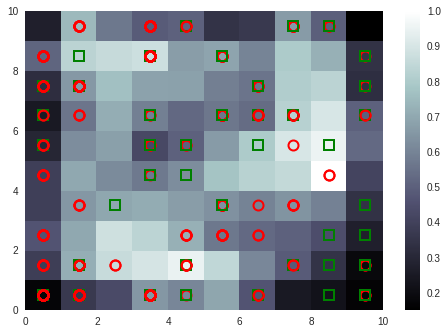

In [21]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

The coordinate below shows the cooridinate of the while blocks at the time of coding this SOM to acculumate frauds together

In [0]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(4,1)], mappings[(8,4)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [26]:
frauds

array([[1.5608595e+07, 0.0000000e+00, 3.0420000e+01, 1.3750000e+00,
        2.0000000e+00, 9.0000000e+00, 8.0000000e+00, 4.0000000e-02,
        0.0000000e+00, 1.0000000e+00, 3.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 3.4000000e+01],
       [1.5761158e+07, 0.0000000e+00, 1.6500000e+01, 1.2500000e+00,
        2.0000000e+00, 1.1000000e+01, 4.0000000e+00, 2.5000000e-01,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.0800000e+02, 9.9000000e+01],
       [1.5711742e+07, 0.0000000e+00, 2.3000000e+01, 1.8350000e+00,
        2.0000000e+00, 5.0000000e+00, 3.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 2.0000000e+02, 5.4000000e+01],
       [1.5770995e+07, 0.0000000e+00, 4.0330000e+01, 8.1250000e+00,
        1.0000000e+00, 4.0000000e+00, 4.0000000e+00, 1.6500000e-01,
        0.0000000e+00, 1.0000000e+00, 2.0000000e+00, 0.0000000e+00,
        2.0000000e+00,